In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import kaleido
import os

BASE_PATH = '../data/raw'
TRAINING_PATH = os.path.join(BASE_PATH,'cs-training.csv')
TEST_PATH = os.path.join(BASE_PATH,'cs-test.csv')

TARGET = 'SeriousDlqin2yrs'


INTERIM_BASE_PATH = '../data/interim'
TRAINING_INTERIM_PATH = os.path.join(INTERIM_BASE_PATH,'training_interim.csv')
TEST_INTERIM_PATH = os.path.join(INTERIM_BASE_PATH,'test_interim.csv')

## CHECK DATA SANITY

In [2]:
training_data = pd.read_csv(TRAINING_PATH)#.drop('Unnamed: 0',axis=1)

In [3]:
#data shape 150.000,12 columns
training_data.shape

(150000, 12)

In [4]:
#number of duplicated data
training_data.duplicated().sum()

0

In [5]:
#list of columns
training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
#example of data
training_data.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [7]:
#checking null values pct
(training_data.isnull().sum()/training_data.shape[0]) * 100

Unnamed: 0                               0.000000
SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

## TARGET VARIABLES

In [8]:
(training_data[TARGET].value_counts()/training_data.shape[0])*100

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

## RevolvingUtilizationOfUnsecuredLines
as the dicionary said that RevolvingUtilizationOfUnsecuredLines is a percentage which means maximal 100 % . However in this case we got maximum of 50708

In [29]:
training_data[['RevolvingUtilizationOfUnsecuredLines']].describe()

,RevolvingUtilizationOfUnsecuredLines
count,150000.000000
mean,6.048438
std,249.755371
min,0.000000
25%,0.029867
50%,0.154181
75%,0.559046
max,50708.000000


In [9]:
#only 3321  / 150.000 contains revolving rate 
filter_revoling = training_data['RevolvingUtilizationOfUnsecuredLines']>1
training_data.loc[filter_revoling].shape

(3321, 12)

In [22]:
hist_revolving_univariate = px.histogram(data_frame=training_data,x='RevolvingUtilizationOfUnsecuredLines',nbins=150,
             log_y=True,orientation='v',opacity=0.5,marginal='box',template='ggplot2',
             color=TARGET)
hist_revolving_univariate.update_layout(title='Logged count of RevolvingUtilizationOfUnsecuredLines')
pio.show(hist_revolving_univariate,validate=False,renderer='iframe')

In [25]:
filter_revoling = training_data['RevolvingUtilizationOfUnsecuredLines']<=1
revolving_util_box = px.box(data_frame=training_data.loc[filter_revoling],
                            y='RevolvingUtilizationOfUnsecuredLines',color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET,template='ggplot2'
                            )
revolving_util_box.update_layout(title='revolving_utilization <=1 ',height=500,width=500)
pio.show(revolving_util_box,validate=False,renderer='iframe')

from boxplot we can see that the TARGET with label == 1 has higher median revolving rate

In [29]:
hist_revolving_bivariate = px.histogram(data_frame=training_data,x='RevolvingUtilizationOfUnsecuredLines',nbins=150,
             log_y=True,log_x=False,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET,template='ggplot2')
hist_revolving_bivariate.update_layout(height=500,width=700,title='Logged count of RevolvingUtilizationOfUnsecuredLines from each target category')
pio.show(hist_revolving_bivariate,validate=False,renderer='iframe')

However we see that class 0 has wider range in terms of Revolving Utilization

## Age

### Univariate

In [30]:
age_univariate = px.histogram(data_frame=training_data,x='age',nbins=150,opacity=0.5,template='ggplot2'
             ,color_discrete_sequence=px.colors.qualitative.Dark2)
pio.show(age_univariate,validate=False,renderer='iframe')

In [41]:
age_bivariate = px.histogram(data_frame=training_data,x='age',nbins=150,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET,template='ggplot2')
age_bivariate.update_layout(title="age histogram and boxplot")
pio.show(age_bivariate,validate=False,renderer='iframe')

from the boxplot we can infer the age with class 1 has lower median than  class 1. 

## NumberOfTime30-59DaysPastDueNotWorse

In [185]:
help(px.box)

Help on function box in module plotly.express._chart_types:

box(data_frame=None, x=None, y=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, orientation=None, boxmode=None, log_x=False, log_y=False, range_x=None, range_y=None, points=None, notched=False, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a box plot, rows of `data_frame` are grouped together into a
        box-and-whisker mark to visualize their distribution.
    
        Each box spans from quartile 1 (Q1) to quartile 3 (Q3). The second
        quartile (Q2) is marked by a line inside the box. By default, the
        whiskers correspond to the box' edges +/- 1.5 times the interquartile
        range (IQR: Q3-Q1), see "point

In [47]:
past_due_3059 = px.histogram(data_frame=training_data,x='NumberOfTime30-59DaysPastDueNotWorse',nbins=150,
             log_y=True,orientation='v',opacity=0.5,template='ggplot2',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
past_due_3059.update_layout(title="NumberOfTime30-59DaysPastDueNotWorse")
pio.show(past_due_3059,validate=False,renderer='iframe')

From both class the number of 30-59 days late keep decreasing to 12 times and start to raise again in 96 to 98 

## DebtRatio

In [ ]:
### Debt Ratio <=1 

In [54]:
filter_debt_ratio = training_data['DebtRatio']<=1
debt_ratio_under_1 = px.histogram(data_frame=training_data.loc[filter_debt_ratio],x='DebtRatio',nbins=200,
             log_y=True,orientation='v',opacity=0.5,marginal='box',template='ggplot2',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
debt_ratio_under_1.update_layout(title='debt ratio (logged count) <=1')
pio.show(debt_ratio_under_1,validate=False,renderer='iframe')

Debt Ratio from target with class ==1 has higher median. The distribution of debt ratio for both clas spiked near zero makin a hill up to 0.2 and start to down gradually to 1.0

In [56]:
filter_debt_ratio = training_data['DebtRatio']>1
debt_ratio_under_1 = px.histogram(data_frame=training_data.loc[filter_debt_ratio],x='DebtRatio',nbins=200,
             log_y=True,orientation='v',opacity=0.5,marginal='box',template='ggplot2',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
debt_ratio_under_1.update_layout(title='debt ratio (logged count) >1')
pio.show(debt_ratio_under_1,validate=False,renderer='iframe')

Meanwhile in debt ratio exceed > 1 both class align until 33K. Class 0 has widest spread which ended up in 300k

## MonthlyIncome

In [63]:
monthly_income = px.histogram(data_frame=training_data,x='MonthlyIncome',nbins=100,
             log_y=True,log_x=False,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET,template='ggplot2')
pio.show(monthly_income,validate=False,renderer='iframe')

In [104]:
training_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'log_RevolvingUtilizationOfUnsecuredLines',
       'exp_RevolvingUtilizationOfUnsecuredLines', 'log_debt_ratio',
       'log_age'],
      dtype='object')

In [107]:
monthly_income = px.histogram(data_frame=training_data,x='NumberOfDependents',nbins=20,
             log_y=True,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
pio.show(monthly_income,validate=False,renderer='iframe')

### Insights : 
From Above chart : 
1. Both 1 and 0 class in financial distress have outlier, 
2. From the spreead looks like the one with financial distress = 0 , has 

### Hypothesis 
people with higher debt ratio tend to have higher debt ratio
1st remove outlier first

In [12]:
## 
temp_income = clean_outlier_per_column(data=training_data,column='MonthlyIncome')

## NumberOfOpenCreditLinesAndLoans

In [113]:
temp_num_credit = clean_outlier_per_column(data=training_data,column='NumberOfOpenCreditLinesAndLoans')

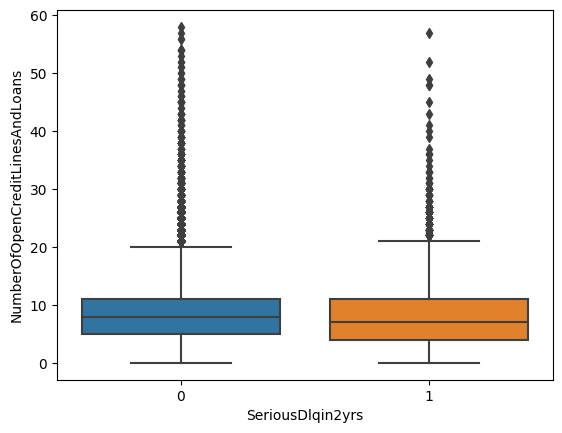

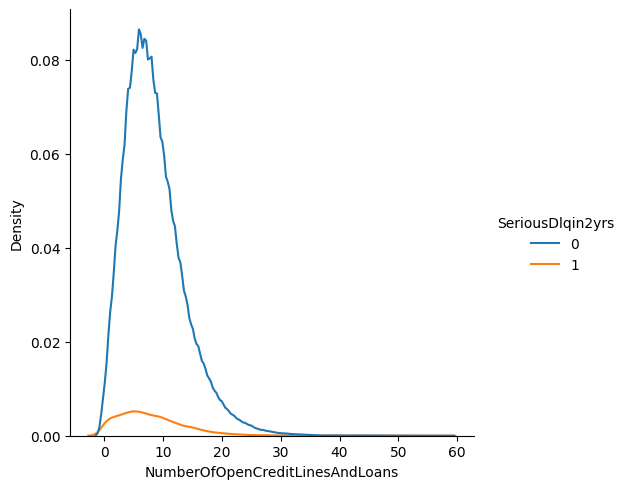

In [17]:
sns.boxplot(data=training_data,y='NumberOfOpenCreditLinesAndLoans',x=TARGET)
sns.displot(data=training_data,x='NumberOfOpenCreditLinesAndLoans',kind='kde',hue=TARGET)

### Insights : 


In [23]:
print('Median TARGET==1',training_data.loc[training_data[TARGET]==1,'NumberOfTimes90DaysLate'].value_counts())
print('Median TARGET==0',training_data.loc[training_data[TARGET]==0,'NumberOfTimes90DaysLate'].value_counts())


Median TARGET==1 0     6554
1     1765
2      776
3      385
4      195
98     143
5       83
6       48
7       31
8       15
9       14
10       5
96       4
11       3
13       2
17       1
14       1
12       1
Name: NumberOfTimes90DaysLate, dtype: int64
Median TARGET==0 0     135108
1       3478
2        779
3        282
98       121
4         96
5         48
6         32
7          7
8          6
9          5
10         3
11         2
15         2
13         2
14         1
96         1
12         1
Name: NumberOfTimes90DaysLate, dtype: int64
